In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

import scipy.sparse as sp

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.base import clone

from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from cycler import cycler

%matplotlib inline

# Loading descriptions

In [25]:
with open('data/steam_game_descriptions.txt', 'r') as f:
  reader = csv.reader(f)
  descriptions = list(reader)

In [26]:
descriptions = descriptions[0]

# Loading targets

In [34]:
with open('data/steam_complete_tag_list.txt', 'r') as f:
  reader = csv.reader(f)
  tag_names = list(reader)

In [35]:
tag_names = tag_names[0]

In [27]:
y_mat = np.load('data/steam_tag_metrix_2.npy')

In [40]:
aggregate = sum(y_mat)

sort_idx = sorted(range(len(aggregate)), key=lambda k: aggregate[k], reverse=True)

y_label_names = [tag_names[idx] for idx in sort_idx]

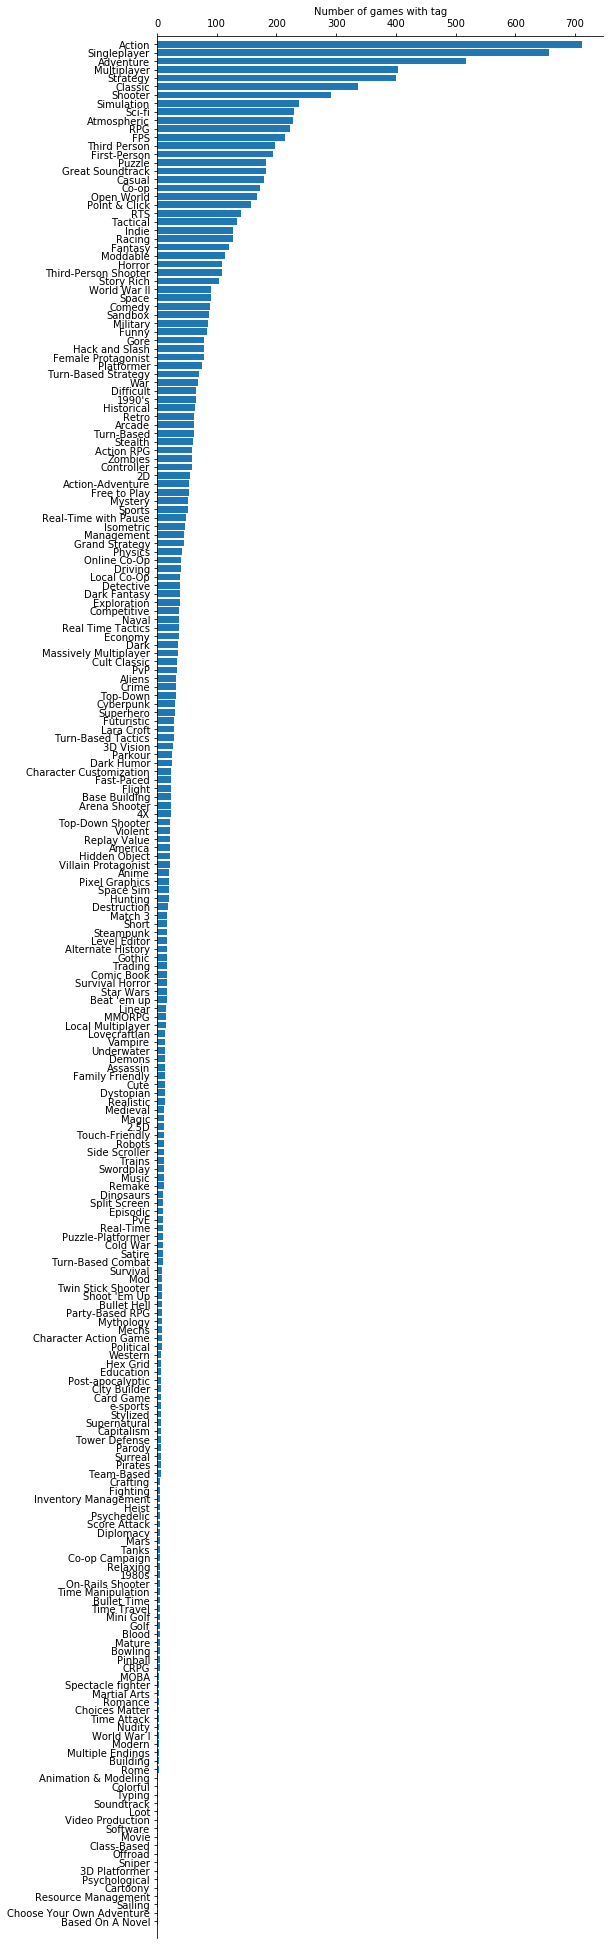

In [57]:
fig, ax = plt.subplots(figsize=(8, 35))
ax.barh(range(0,len(tag_names)), aggregate[sort_idx])

ax.set_ylim([-1, len(tag_names)+1])
ax.set_yticks(range(0,len(tag_names)))
ax.set_yticklabels(y_label_names);

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.set(xlabel='Number of games with tag');

ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('steam_genre_distribution.png', bbox_inches='tight')